In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk

In [17]:
df = pd.read_csv("C:/Users/eren/Desktop/yeni veriler/data/asılveriler.csv")

In [19]:
df
     


,metin
0,Oliver James Cooke \n09000916 \n1
1,Oliver James Cooke 09000916 \n2 \n Preface Pr...
2,Oliver James Cooke 09000916 \n3 \n Contents ...
3,Oliver James Cooke 09000916 \n7
4,Oliver James Cooke 09000916 \n8
5,Oliver James Cooke 09000916 \n9
6,Oliver James Cooke 09000916 \n10
7,Oliver James Cooke 09000916 \n11 \n Game Mec...
8,Oliver James Cooke 09000916 \n13 \n \nChara...
9,Oliver James Cooke 09000916 \n24 \n Weapon P...


In [21]:
def zipf_analysis(text_column, num_words=50):
    # Geçersiz ve boş değerleri temizle
    cleaned_texts = text_column.dropna().astype(str)

    if cleaned_texts.empty:
        print("Uyarı: Metin verisi boş. Analiz yapılamaz.")
        return

    # Metinleri birleştir ve temizle
    text = ' '.join(cleaned_texts).lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizasyon
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    if not tokens:
        print("Uyarı: Temizleme sonrası analiz yapılacak kelime kalmadı.")
        return

    # Kelime sıklığı
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık verileri
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Grafik
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='o')
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (Ham Veri)')
    plt.grid(True)
    plt.show()

    # Bilgi çıktısı
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti küçük. Zipf analizi sınırlı genellenebilir.")
    else:
        print("Veri seti yeterli büyüklükte.")

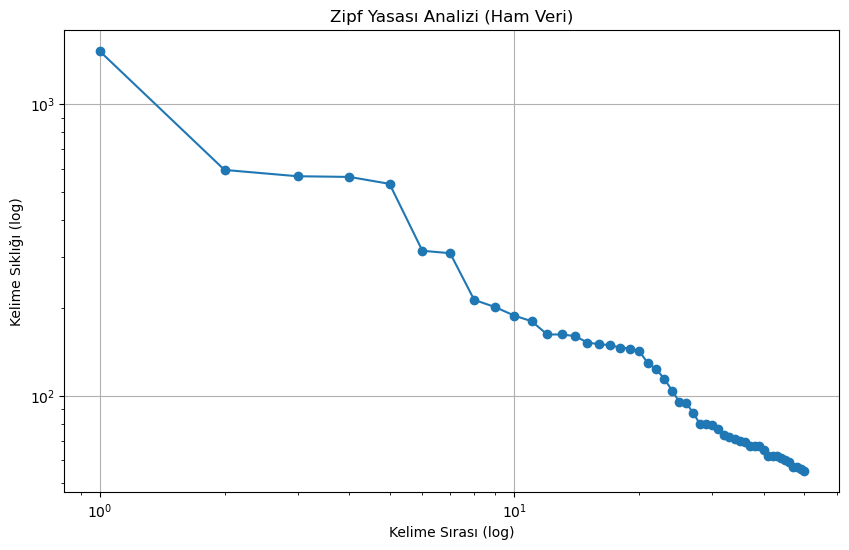

Toplam kelime sayısı: 21563
Farklı kelime sayısı: 4376
Veri seti yeterli büyüklükte.


In [23]:
df = pd.read_csv(r"C:\Users\eren\Desktop\yeni veriler\data\asılveriler.csv", header=None, names=["metin"])
zipf_analysis(df["metin"])